<h2> Name : JAYAWEERA J A A M </h2>
<h2> Index Number : 174060E </h2>

<h2> loading dataset using pandas library </h2>


In [1]:
import pandas as pd

df = pd.read_csv('weatherHistory.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<h3> As we can see from the dataset, the Daily Summary column is derived from the Summary column 
    So, here drop the Daily Summary column </h3>

In [2]:
# drop Daily Summary Column
df = df.drop(['Daily Summary'],axis=1)

<h3> Handling Missing Values </h3>

In [3]:
# check for missing values in any column
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
dtype: bool

In [4]:
# check ratio between null data points and all data points
df.isnull().sum()/len(df.index)

Formatted Date              0.00000
Summary                     0.00000
Precip Type                 0.00536
Temperature (C)             0.00000
Apparent Temperature (C)    0.00000
Humidity                    0.00000
Wind Speed (km/h)           0.00000
Wind Bearing (degrees)      0.00000
Visibility (km)             0.00000
Loud Cover                  0.00000
Pressure (millibars)        0.00000
dtype: float64

<h4> Precip column has very low percentage comparte to the dataset. It is 0.00536%
    So, drop null values here </h4>

In [5]:
df = df.dropna()
df.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
dtype: bool

<h4> Describe Data </h4>

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


<h4>
    As we can see, Loud Cover is always zero for every data point. because min and max is zero, therefore,
    we need to drop it. because no effect from that feature 
</h4>

In [7]:
# drop Loud Cover
df = df.drop(['Loud Cover'],axis=1)

<h4> In here, we does not consider time series for our model. so, we can drop formatted column </h4>

In [8]:
# drop Formatted Date
df = df.drop(['Formatted Date'],axis=1)
df.head(5)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


<h3> Handling outliers </h3>

<AxesSubplot:>

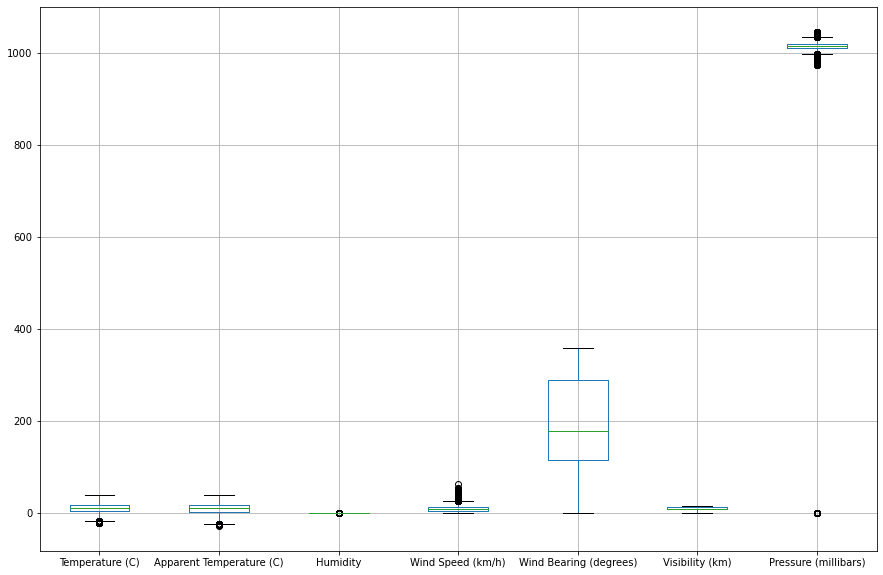

In [9]:
# Draw boxplot
df.boxplot(figsize=(15,10))

In [10]:
# Check global outliers
min_p = df.quantile(0.05)
max_p = df.quantile(0.95)

# Column vs Number of Outliers
((df <= min_p) | (df >= max_p)).sum()

Apparent Temperature (C)     9614
Humidity                    10254
Precip Type                     0
Pressure (millibars)         9607
Summary                         0
Temperature (C)              9617
Visibility (km)             11843
Wind Bearing (degrees)      10585
Wind Speed (km/h)            9616
dtype: int64

<h3> It is not good method to remove all outliers. Becuase there are lot amount </h3>
<h4> Therefore, without removing all outliers we can check anomalies and contextual outliers </h4>
<h4> We can consider first contextual outliers </h4>

<h4> Humidity couldn't be zero (0) in general context. So , we can remove zero values </h4>

Before Shape: (95936, 9)
After Shape: (95914, 9)


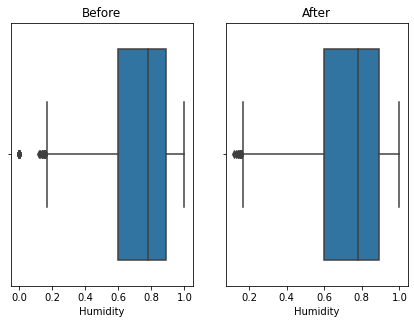

In [11]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df.shape)

# Removing zeros
df2 = df[(df['Humidity'] > 0)]

#Visulization
print("After Shape:",df2.shape)

# Plot Boxplots
sns.boxplot(df['Humidity'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Humidity'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df = df2

<h4> 22 rows deleted by the Humidity contextual outlier handling </h4>

<p> 
    <h4> Reference - https://www.weather.gov/source/zhu/ZHU_Training_Page/winds/pressure_winds/Pressure.htm </h4>
    <h4> Pressure (millibars) has lot of outliers and some outliers are far away from other outliers. But, Pressure (millibars) should lie between from 100 - 1050 </h4>
    <h4> so, first remove outside of the above range and recheck. Becuase datapoints outside of that range are contextual outliers </h4>
</p>

Before Shape: (95914, 9)
After Shape: (94626, 9)


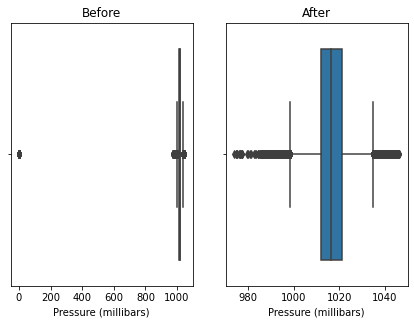

In [12]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df.shape)

# Removing zeros
df2 = df[(df['Pressure (millibars)'] >= 100) & (df['Pressure (millibars)'] <= 1050)]

#Visulization
print("After Shape:",df2.shape)

# Plot Boxplots
sns.boxplot(df['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df = df2

<h4> 288 rows deleted by the Pressure (millibars) feature contextual outlier handling </h4>

<h4> Boxplot for Wind Speed (km/h) </h4>

<AxesSubplot:>

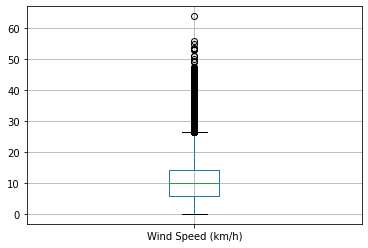

In [13]:
df.boxplot(column=['Wind Speed (km/h)'])

<h4> We can see global outlier in the Wind Speed feature (km/h). That is the data point above from 60 </h4>
<h4> So, we can remove it and check the how many rows affected the Wind Speed global outlier handling </4>

Before Shape: (94626, 9)
After Shape: (94625, 9)


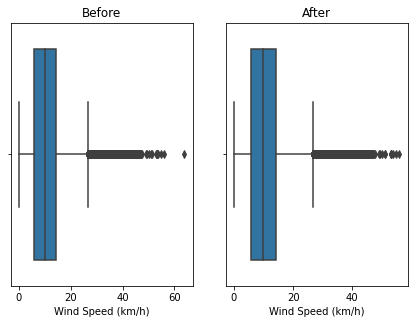

In [14]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",df.shape)

# Removing zeros
df2 = df[(df['Wind Speed (km/h)'] <= 60)]

#Visulization
print("After Shape:",df2.shape)

# Plot Boxplots
sns.boxplot(df['Wind Speed (km/h)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['Wind Speed (km/h)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

df = df2

<h4> One row deleted by the Wind Speed global outlier handling </h4>

<h3> Next step is transformations </h3>
<h4> before that, need to indenity wich features need transformations </h4>

<h4> Histogram for Temperature (C) </h4>

<AxesSubplot:>

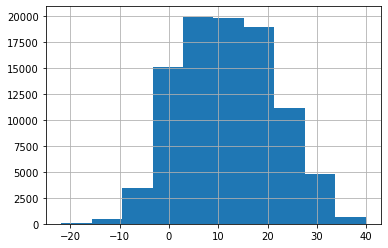

In [15]:
df["Temperature (C)"].hist()

<h4> Q-Q Plot for Temperature (C) </h4>

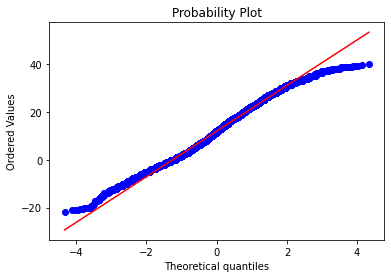

In [16]:
import scipy.stats as stats
stats.probplot(df["Temperature (C)"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Apparent Temperature (C) </h4>

<AxesSubplot:>

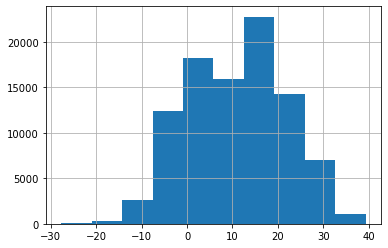

In [17]:
df["Apparent Temperature (C)"].hist()

<h4> Q-Q Plot for Apparent Temperature (C) </h4>

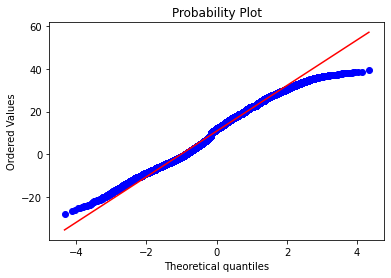

In [18]:
stats.probplot(df["Apparent Temperature (C)"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Humidity </h4>

<AxesSubplot:>

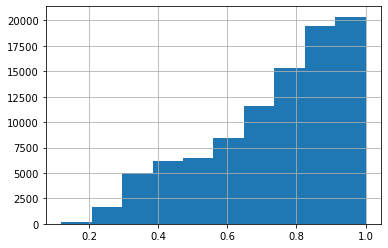

In [19]:
df["Humidity"].hist()

<h4> Q-Q Plot for Humidity </h4>

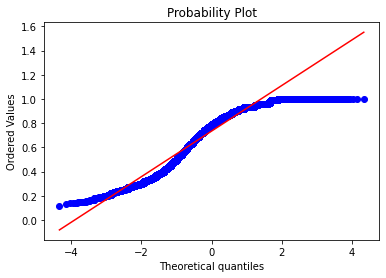

In [20]:
stats.probplot(df["Humidity"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Wind Speed (km/h) </h4>

<AxesSubplot:>

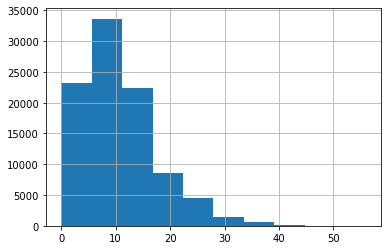

In [21]:
df["Wind Speed (km/h)"].hist()

<h4> Q-Q Plot for Wind Speed (km/h) </h4>

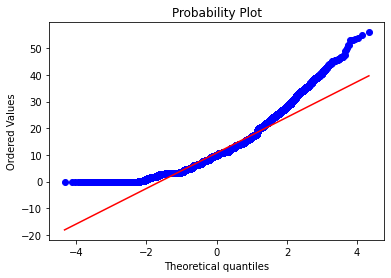

In [22]:
stats.probplot(df["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Wind Bearing (degrees) </h4>

<AxesSubplot:>

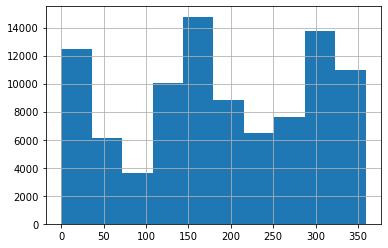

In [23]:
df["Wind Bearing (degrees)"].hist()

<h4> Q-Q Plot for Wind Bearing (degrees) </h4>

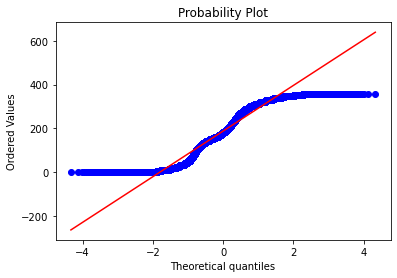

In [24]:
stats.probplot(df["Wind Bearing (degrees)"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Visibility (km) </h4>

<AxesSubplot:>

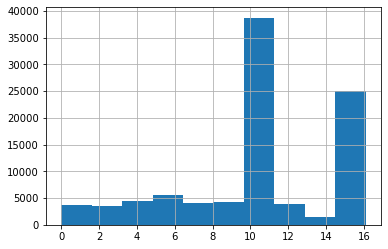

In [25]:
df["Visibility (km)"].hist()

<h4> Q-Q Plot for Visibility (km) </h4>

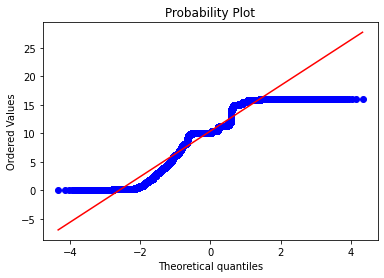

In [26]:
stats.probplot(df["Visibility (km)"], dist="norm", plot=plt)
plt.show()

<h4> Histogram for Visibility (km) </h4>

<AxesSubplot:>

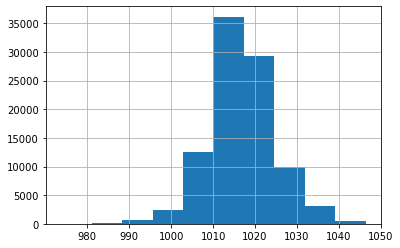

In [27]:
df["Pressure (millibars)"].hist()

<h4> Q-Q Plot for Wind Bearing (degrees) </h4>

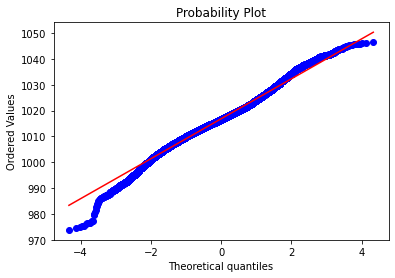

In [28]:
stats.probplot(df["Pressure (millibars)"], dist="norm", plot=plt)
plt.show()

<h3> Apply transformations </h3>
    
<h4> Following features need tranformations </h4>
    <ul> 
        <li> Humidity - left skewed </li>
        <li> Wind Speed (km/h) - right skewed </li>
    </ul>


<h4> before transformation, we need to split our dataset, otherwise Data Leakage will be happend </h4>

<h4> Split Dataset </h4>

In [29]:
# Defining X and y 

X = df.drop('Apparent Temperature (C)', 1)
y = pd.DataFrame(df['Apparent Temperature (C)'], columns=["Apparent Temperature (C)"])

from sklearn.model_selection import train_test_split

# Spliting dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

# Reset indexes

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

<h4> Apply exponential transformation for Humidity column </h4>

In [30]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define required columns for exponential transformation
columns = ['Humidity']

# Init exp transformer with exponential transformation
exp = FunctionTransformer(np.exp, validate=True)

# Apply the transformation for train data
tansformed_df_train = exp.transform(X_train[columns])

# Re-init dataframe by new values
df_new_train = pd.DataFrame(tansformed_df_train, columns=columns)

# Replace X_train data with new values
X_train['Humidity'] = df_new_train['Humidity']

# Do it also for the test data

# Apply the transformation for test data
tansformed_df_test = exp.transform(X_test[columns])

# Re-init dataframe by new values
df_new_test = pd.DataFrame(tansformed_df_test, columns=columns)

# Replace X_train data with new values
X_test['Humidity'] = df_new_test['Humidity']

<h4> Histogram for Humidity after applying exp </h4>

<AxesSubplot:>

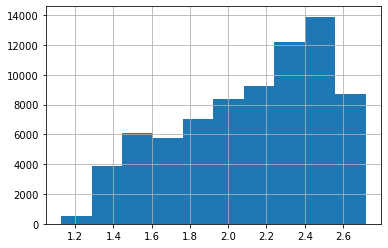

In [31]:
X_train["Humidity"].hist()

<h4> Q-Q Plot for Humidity after applying exp </h4>

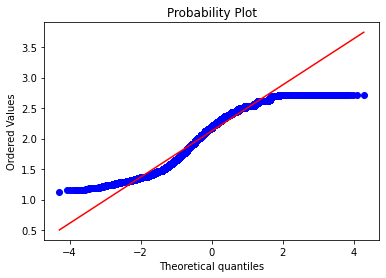

In [32]:
stats.probplot(X_train["Humidity"], dist="norm", plot=plt)
plt.show()

<h4> Apply logarithm transformation for Wind Speed (km/h) column </h4>

In [33]:
# Define required columns for logarithm transformation
columns = ['Wind Speed (km/h)']

# Init log transformer with logarithm transformation 
# Natural logarithm function with plus 1 - log(1 + x)
log = FunctionTransformer(np.log1p)

# Apply the transformation for train data
tansformed_df_train = log.transform(X_train[columns])

# Re-init dataframe by new values
df_new_train = pd.DataFrame(tansformed_df_train, columns=columns)

# Replace X_train data with new values
X_train['Wind Speed (km/h)'] = df_new_train['Wind Speed (km/h)']

# Do it also for the test data

# Apply the transformation for test data
tansformed_df_test = log.transform(X_test[columns])

# Re-init dataframe by new values
df_new_test = pd.DataFrame(tansformed_df_test, columns=columns)

# Replace X_train data with new values
X_test['Wind Speed (km/h)'] = df_new_test['Wind Speed (km/h)']

<h4> Histogram for Wind Speed (km/h) after applying logarithm </h4>

<AxesSubplot:>

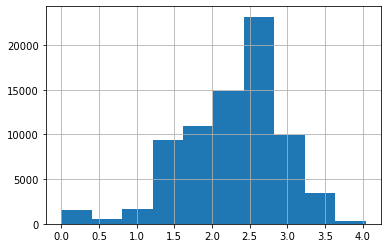

In [34]:
X_train['Wind Speed (km/h)'].hist()

<h4> Q-Q Plot for Wind Speed (km/h) after applying logarithm </h4>

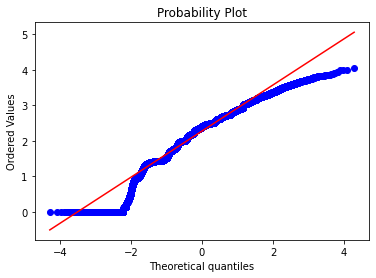

In [35]:
stats.probplot(X_train["Wind Speed (km/h)"], dist="norm", plot=plt)
plt.show()

<h3> Next step is data coding </h3>

<h4> Precip Type required data coding </h4>

In [36]:
# First check number of unique values
df['Precip Type'].nunique()

2

In [37]:
'''
    Precip Type only has two type of values 
    So, we can apply Label Encoding
'''

# Apply for training dataset
X_train['Precip Type'] = X_train['Precip Type'].astype('category')
X_train['Precip Type'] = X_train['Precip Type'].cat.codes

# Apply for testing dataset
X_test['Precip Type'] = X_test['Precip Type'].astype('category')
X_test['Precip Type'] = X_test['Precip Type'].cat.codes

<h4> Summary required data coding </h4>

In [38]:
# First check number of unique values
df['Summary'].nunique()

26

In [39]:
'''
    Summary feature has 26 type of values 
    So, it is better to apply one-hot encoding for this type scenario. 
    Becuase adding cat code, include unnecessary weights on params. 
    But, Summary is actualy dreived attribute from other features.
    So, here I used cat code instead of one-hot encoder and I will show there is no effect from that summary feature after applying PCA
'''

# Apply for training dataset
X_train['Summary'] = X_train['Summary'].astype('category')
X_train['Summary'] = X_train['Summary'].cat.codes

# Apply for testing dataset
X_test['Summary'] = X_test['Summary'].astype('category')
X_test['Summary'] = X_test['Summary'].cat.codes

<h4> Let's see after feature coding </h4>

In [40]:
X_train.head(5)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,17,0,19.288889,2.339647,1.904418,53.0,11.6886,1009.81
1,18,0,10.333333,2.363161,2.402105,147.0,14.3934,1021.53
2,16,0,7.222222,2.225541,2.817186,159.0,9.9820,1023.08
3,17,1,0.000000,2.117000,2.605789,138.0,15.8263,1023.06
4,6,1,-0.072222,2.363161,2.696645,140.0,9.7083,1014.96


<h3> Next step is feature scaling </h3>

In [41]:
from sklearn.preprocessing import StandardScaler

# Removing Categorical Features before the feature scaling
columns = X_train.columns
# Remove Summary and Precip Type columns
columns_new = np.delete(columns,np.s_[:2])
# Removed Columns
removed_columns = np.delete(columns,np.s_[2:])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler() 

#Transformation of training dataset features
X_train_except = pd.DataFrame(X_train, columns = columns_new)
scaler.fit(X_train_except)
X_train = pd.DataFrame(scaler.transform(X_train_except), columns = columns_new).join(X_train[removed_columns])

#Transformation of testing dataset features
X_test_except = pd.DataFrame(X_test, columns = columns_new)
scaler.fit(X_test_except)
X_test = pd.DataFrame(scaler.transform(X_test_except), columns = columns_new).join(X_test[removed_columns])

X_train.head(2)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Precip Type
0,0.766930,0.556533,-0.562891,-1.250876,0.310161,-0.898782,17,0
1,-0.169667,0.617147,0.187213,-0.376384,0.958855,0.608059,18,0


In [42]:
# get target (y)
columns = y_train.columns

#Transformation of training target (y)
y_train_except = pd.DataFrame(y_train, columns = columns)
scaler.fit(y_train_except)
y_train = pd.DataFrame(scaler.transform(y_train_except), columns = columns)

#Transformation of testing target (y)
y_test_except = pd.DataFrame(y_test, columns = columns)
scaler.fit(y_test_except)
y_test = pd.DataFrame(scaler.transform(y_test_except), columns = columns)

y_train.head(2)

,Apparent Temperature (C)
0,0.785721
1,-0.051233


<h4> Plot histrogram to see feature scaling effect for X_train features </p4>

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Summary'}>,
        <AxesSubplot:title={'center':'Precip Type'}>, <AxesSubplot:>]],
      dtype=object)

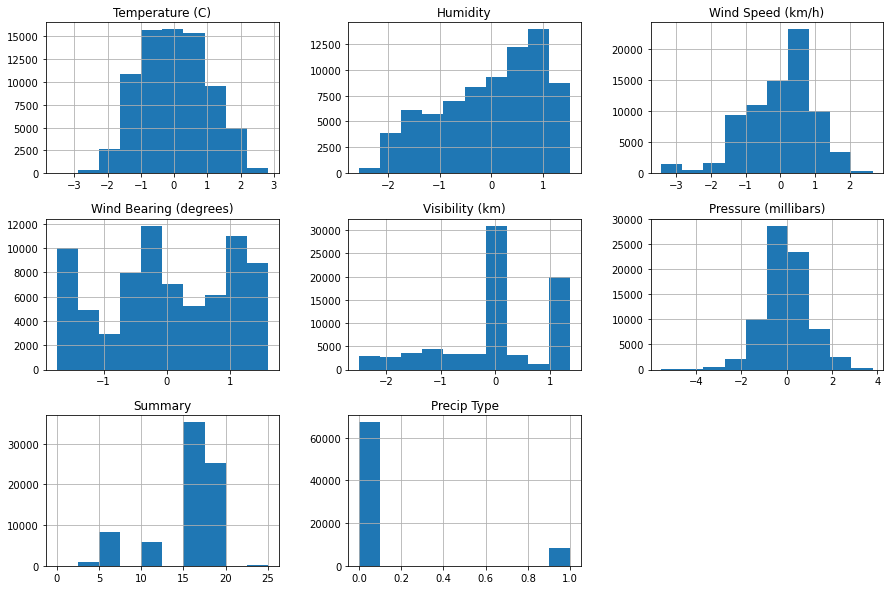

In [43]:
X_train.hist(figsize=(15,10))

<h4> Plot histrogram to see feature scaling effect for target variable y </h4>

array([[<AxesSubplot:title={'center':'Apparent Temperature (C)'}>]],
      dtype=object)

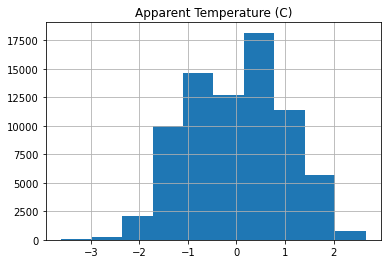

In [44]:
y_train.hist()

<h3> Next setp is feature discretization </h3>

In [45]:
'''
    Wind Bearing (degrees) has large range data
    Wind Bearing (degrees) vary from 0 - 360
    We know Wind Bearing or Wind Direction can divided to 8 bins accroding the main directions 
    such as North (N), North-East (NE) , East (E), etc.
'''

from sklearn.preprocessing import KBinsDiscretizer

# Init discretizer with 8 bins
discretizer = KBinsDiscretizer(n_bins = 8, encode = 'ordinal', strategy = 'kmeans') 

# Init X_train with Wind Bearing (degrees)
data_train = pd.DataFrame(X_train, columns = ['Wind Bearing (degrees)'])

# Fit the scaler to the train data
discretizer.fit(data_train)

# Set data after discretization
X_train['Wind Bearing (degrees)'] = pd.DataFrame(discretizer.transform(data_train))

# Init X_test with Wind Bearing (degrees)
data_test = pd.DataFrame(X_test, columns = ['Wind Bearing (degrees)'])

# Fit the scaler to the test data
discretizer.fit(data_test)

# Set data after discretization
X_test['Wind Bearing (degrees)'] = pd.DataFrame(discretizer.transform(data_test))

X_train.head(5)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary,Precip Type
0,0.766930,0.556533,-0.562891,1.0,0.310161,-0.898782,17,0
1,-0.169667,0.617147,0.187213,3.0,0.958855,0.608059,18,0
2,-0.495036,0.262392,0.812815,3.0,-0.099134,0.807343,16,0
3,-1.250356,-0.017403,0.494202,3.0,1.302508,0.804772,17,1
4,-1.257909,0.617147,0.631139,3.0,-0.164776,-0.236646,6,1


<h4> Plot histrogram to see effect of discretization for Wind Bearing (degrees) feature </h4>

<AxesSubplot:>

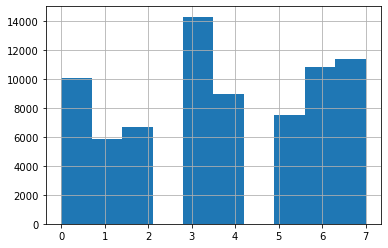

In [46]:
X_train['Wind Bearing (degrees)'].hist()

 <h3> Now, Pre-processing steps are completed and next step is performing Feature Engineering </h3>

In [47]:
# shape of our train features
X_train.shape

(75700, 8)

<h3> First we, Identify dependent and independent features using heatmap for continuous feature values </h3>

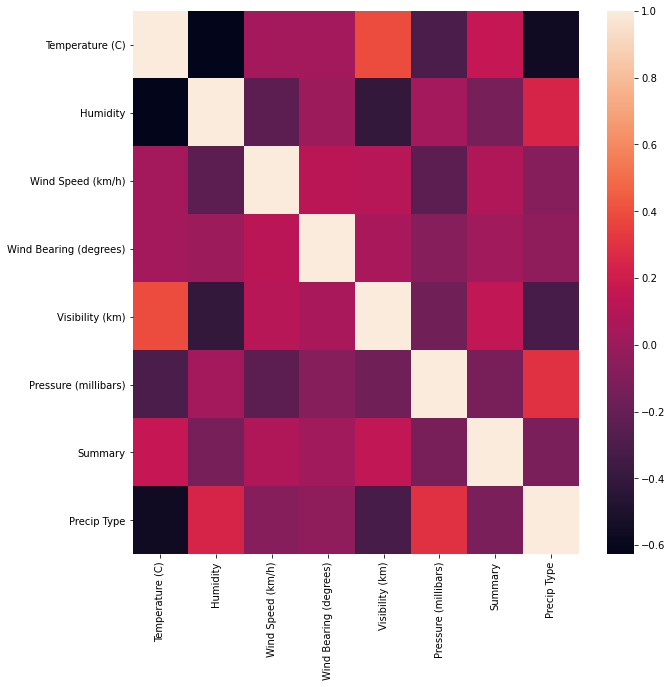

In [48]:
# plot heatmap
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr());

<h3>  Seems the all features can be assuemed as independent. Becuase there is strong correlation between any two features </h3>

<h3> Test the signifncance of the continuous features </h3>

                          Apparent Temperature (C)  Temperature (C)  Humidity  \
Apparent Temperature (C)                  1.000000         0.992655 -0.599002   
Temperature (C)                           0.992655         1.000000 -0.628003   
Humidity                                 -0.599002        -0.628003  1.000000   
Wind Speed (km/h)                        -0.035899         0.030521 -0.235443   
Wind Bearing (degrees)                    0.028655         0.029291  0.004685   
Visibility (km)                           0.380397         0.391534 -0.406754   
Pressure (millibars)                     -0.287022        -0.309044  0.039559   
Summary                                   0.151323         0.156556 -0.137832   
Precip Type                              -0.563356        -0.561092  0.243067   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Apparent Temperature (C)          -0.035899                0.028655   
Temperature (C)                    0.030521    

<AxesSubplot:>

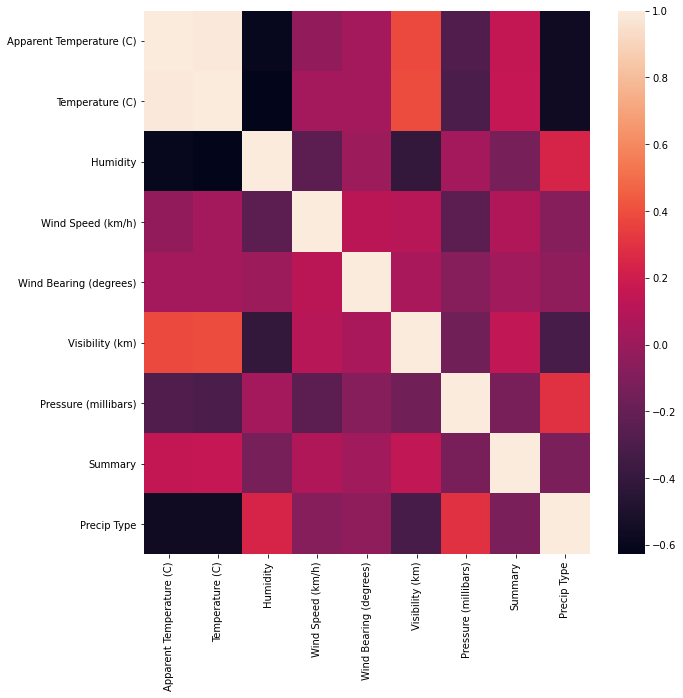

In [49]:
#test the signifncance of the continuous features
d_data = pd.concat([y_train,X_train], axis=1, join="inner")
print(d_data.corr())
plt.figure(figsize = (10,10))
sns.heatmap(d_data.corr()) 

<h4> Significant Features </h4>
    <ul>
        <li> Temperature (C) </li>
        <li> Visibility (km) </li>
        <li> Humidity </li>
        <li> Precip Type </li>
        <li> Pressure (millibars) - this has low significance level but we can consider. </li>
    </ul>

<h4> Copy dataset and keep only significanr features </h4>

In [50]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

X_train_copy = X_train_copy.drop('Wind Speed (km/h)', 1)
X_train_copy = X_train_copy.drop('Wind Bearing (degrees)', 1)
X_train_copy = X_train_copy.drop('Summary', 1)

X_test_copy = X_test_copy.drop('Wind Speed (km/h)', 1)
X_test_copy = X_test_copy.drop('Wind Bearing (degrees)', 1)
X_test_copy = X_test_copy.drop('Summary', 1)

<h3> Apply PCA </h3>

In [51]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_copy)
pca.explained_variance_ratio_

array([0.50510525, 0.2382765 , 0.16305408, 0.07897385, 0.01459032])

<h4> Explained Variance Ratios can be achieved more than 95% using 4 components </h4>

In [52]:
pca.explained_variance_ratio_[:4].sum()

0.9854096823853052

<h4> Init PCA with 4 compoents </h4>

In [53]:
pca = PCA(n_components = 4)
pca.fit(X_train_copy)
X_train_pca = pca.transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)

<h4> Fit the model </h4>

In [54]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train_copy,y_train)
y_hat = lm.predict(X_test_copy)
y_hat = pd.DataFrame(y_hat, columns=["predicted"])
y_hat.head(5)

,predicted
0,-0.352704
1,1.864357
2,0.234721
3,0.747670
4,-1.178509


In [55]:
# Coefficients 
lm.coef_

array([[ 1.02734886e+00,  4.67019816e-02, -2.63524341e-04,
         3.08752782e-02, -2.43084896e-02]])

In [56]:
#Intercept of the model
print(lm.intercept_)

[0.00269256]


In [57]:
from sklearn.metrics import mean_squared_error
mse_for_pca = mean_squared_error(y_test, y_hat)
mse_for_pca

0.012801289485325378

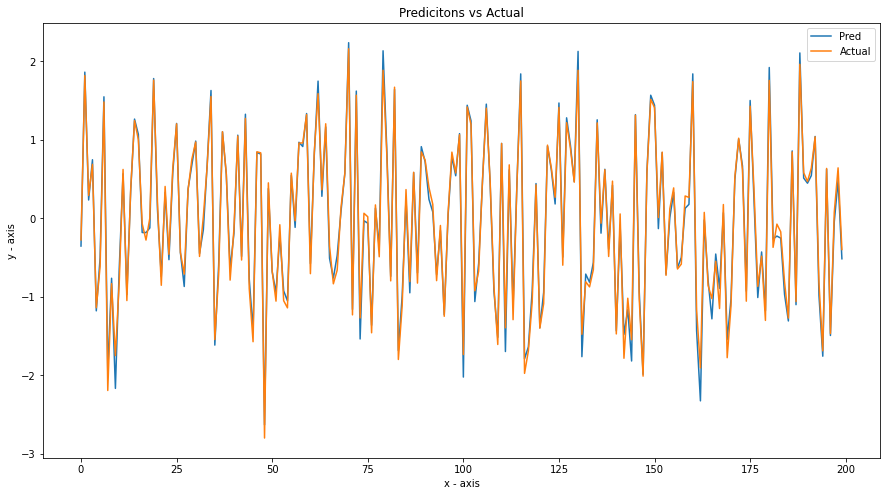

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(y_hat[:200], label = "Pred")
plt.plot(y_test[:200], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predicitons vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [59]:
X_combined = np.r_[X_train_copy, X_test_copy]
y_combined = np.r_[y_train, y_test]

In [60]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(model, X_combined, y_combined, cv=5)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98718359 0.98696095 0.98710663 0.98738851 0.98719871]


In [61]:
predictions = cross_val_predict(model, X_combined, y_combined, cv=6)
accuracy = metrics.r2_score(y_test, y_hat)
print("Cross-Predicted Accuracy : %.3f " % (accuracy * 100))

Cross-Predicted Accuracy : 98.720 
